# Purpose of this file is to plot data of AccelGyro and Magnetometer extraction times

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Reccorded in the evening (Around 5 minutes)
data_eve_path = "/content/drive/My Drive/PROJECT/data_sheets/sensor_intervals.csv"

# Data Recorded in the morning (Arnound 10 minutes)
data_mrn_path = "/content/drive/My Drive/PROJECT/data_sheets/sensor_intervals_morning.csv"

data_grouped = "/content/drive/My Drive/PROJECT/data_sheets/sensor_intervals_grouped.csv"

This script reads three CSV files (evening, morning, and grouped sensor interval data), converts stringified list entries back into Python lists, and combines morning and evening datasets into one for further analysis.

In [ ]:
import pandas as pd
import ast

# Read CSV files
df_eve = pd.read_csv(data_eve_path)       # Evening dataset
df_morning = pd.read_csv(data_mrn_path)   # Morning dataset
df_grouped = pd.read_csv(data_grouped)    # Grouped sensor intervals

# Output shape of morning and evening data
print(f"Shapes for eve / mrn:  {df_eve.shape} / {df_morning.shape}")

# Step 1: Convert string representations of lists back to actual Python lists
# This is necessary if the CSV saved lists as strings (e.g., "[1, 2, 3]")

for col in df_eve.columns:
    df_eve[col] = df_eve[col].apply(ast.literal_eval)

for col in df_morning.columns:
    df_morning[col] = df_morning[col].apply(ast.literal_eval)

for col in df_grouped.columns:
    df_grouped[col] = df_grouped[col].apply(ast.literal_eval)

# Step 2: Concatenate morning and evening DataFrames (stack rows)
df_combined = pd.concat([df_eve, df_morning], ignore_index=True)

# Display sample rows and combined shape
print(df_combined.head())
print(f"Combined Shape: {df_combined.shape}")

Shapes for eve / mrn:  (13733, 6) / (24691, 6)
            RArm           Back         RThigh           LArm         RShank  \
0  [3357, 11169]  [1953, 11109]  [1984, 11108]  [1984, 11078]  [1984, 11078]   
1  [1984, 11078]  [1954, 11047]  [1984, 11108]  [1953, 11078]  [3448, 11200]   
2  [1953, 11078]  [3052, 11078]  [1984, 11078]  [1953, 11078]  [1984, 11047]   
3  [1953, 11047]  [1983, 11078]  [1984, 11078]  [1953, 11078]  [1953, 11047]   
4  [1984, 11047]  [1953, 11078]  [3082, 11170]  [2990, 11109]  [1984, 11108]   

          LShank  
0  [1984, 11077]  
1  [1953, 11078]  
2  [1984, 10895]  
3  [1953, 11047]  
4  [1984, 11047]  
Combined Shape: (38424, 6)
Grouped Shape: 13062


<ipython-input-53-d2148556561d>:29: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# Plot Data

<ipython-input-29-824417f98441>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




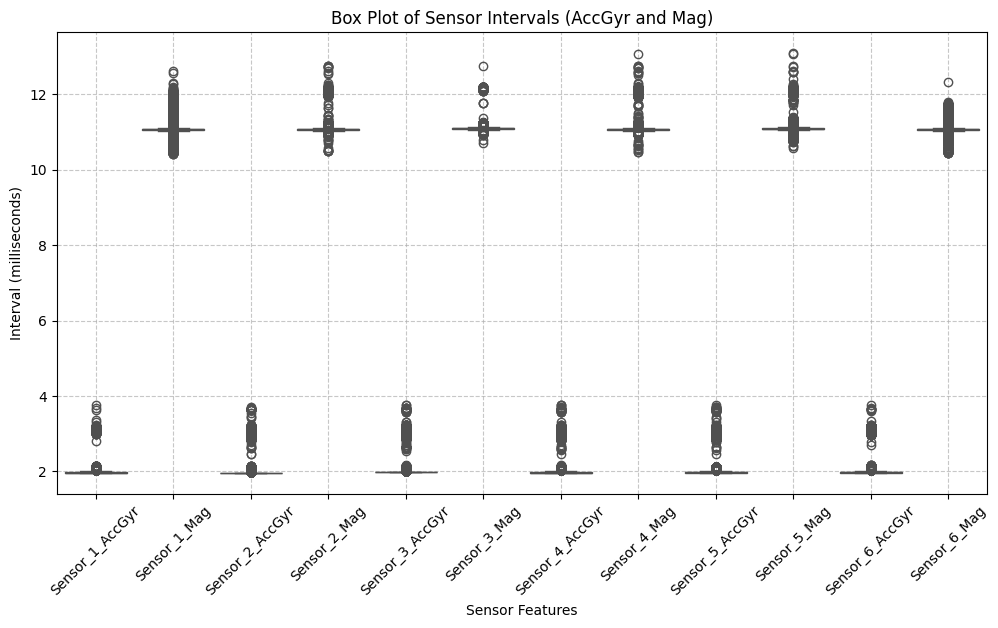

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


flattened_data = {}

sensor_idx = 0

for col in df_combined.columns:
    sensor_idx += 1
    accGyr_values = [round(pair[0] / 1000, 2) for pair in df_combined[col]]
    mag_values = [round(pair[1] / 1000, 2) for pair in df_combined[col]]

    flattened_data[f"Sensor_{sensor_idx}_AccGyr"] = accGyr_values
    flattened_data[f"Sensor_{sensor_idx}_Mag"] = mag_values

# Convert to DataFrame
df_boxplot = pd.DataFrame(flattened_data)

# Reshape data for Plotly (long format)
df_melted = df_boxplot.melt(var_name="Sensor Feature", value_name="Interval (ms)")

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sensor Feature", y="Interval (ms)", data=df_melted, palette="coolwarm")

# Customize plot appearance
plt.xticks(rotation=45)
plt.title("Box Plot of Sensor Intervals (AccGyr and Mag)")
plt.xlabel("Sensor Features")
plt.ylabel("Interval (milliseconds)")
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()

<ipython-input-54-34b372149efb>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




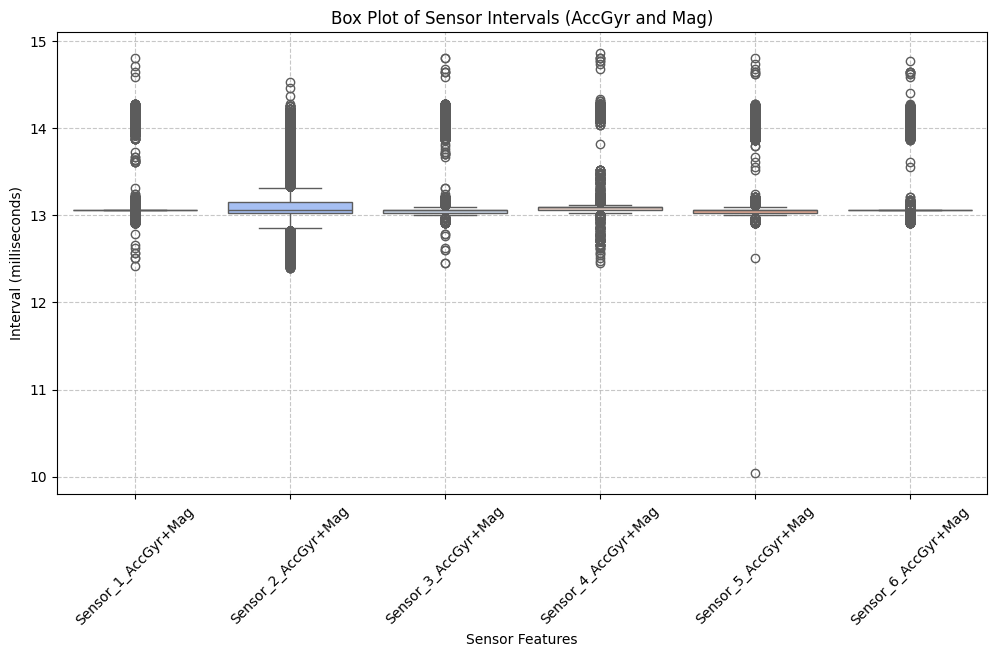

In [ ]:
flattened_data = {}

sensor_idx = 0

for col in df_grouped.columns:
    sensor_idx += 1
    values = [round(int(val[0]) / 1000, 2) for val in df_grouped[col]]

    flattened_data[f"Sensor_{sensor_idx}_AccGyr+Mag"] = values

# Convert to DataFrame
df_boxplot = pd.DataFrame(flattened_data)

# Reshape data for Plotly (long format)
df_melted = df_boxplot.melt(var_name="Sensor Feature", value_name="Interval (ms)")

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sensor Feature", y="Interval (ms)", data=df_melted, palette="coolwarm")

# Customize plot appearance
plt.xticks(rotation=45)
plt.title("Box Plot of Sensor Intervals (AccGyr and Mag)")
plt.xlabel("Sensor Features")
plt.ylabel("Interval (milliseconds)")
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [ ]:

# Compute descriptive statistics for df_boxplot
df_stats = df_boxplot.describe().T  # Transpose for better readability

# Extract mean, mode, min, and max
df_summary = df_stats[['max','min','mean']]  # Extract mean, min, and max
df_summary['mean'] = df_summary['mean'].round(2)
df_summary['mode'] = df_boxplot.mode().iloc[0]  # Compute mode and take the first row

print(df_summary)

                   max    min   mean   mode
Sensor_1_AccGyr   3.75   1.95   1.98   1.95
Sensor_1_Mag     12.63  10.41  11.10  11.08
Sensor_2_AccGyr   3.72   1.95   2.06   1.95
Sensor_2_Mag     12.76  10.50  11.12  11.08
Sensor_3_AccGyr   3.75   1.98   2.15   1.98
Sensor_3_Mag     12.76  10.71  11.11  11.11
Sensor_4_AccGyr   3.75   1.95   2.06   1.95
Sensor_4_Mag     13.06  10.47  11.14  11.08
Sensor_5_AccGyr   3.75   1.95   2.10   1.98
Sensor_5_Mag     13.09  10.59  11.10  11.08
Sensor_6_AccGyr   3.75   1.95   2.02   1.95
Sensor_6_Mag     12.33  10.44  11.07  11.08


<ipython-input-46-808c8073553e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-808c8073553e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Compute descriptive statistics for df_boxplot
df_stats = df_boxplot.describe().T  # Transpose for better readability

# Extract mean, mode, min, and max
df_summary = df_stats[['max','min','mean']]  # Extract mean, min, and max
df_summary['mean'] = df_summary['mean'].round(2)
df_summary['mode'] = df_boxplot.mode().iloc[0]  # Compute mode and take the first row

print(df_summary)

                       max    min   mean   mode
Sensor_1_AccGyr+Mag  14.80  12.42  13.19  13.06
Sensor_2_AccGyr+Mag  14.53  12.39  13.12  13.06
Sensor_3_AccGyr+Mag  14.80  12.45  13.20  13.06
Sensor_4_AccGyr+Mag  14.86  12.45  13.12  13.09
Sensor_5_AccGyr+Mag  14.80  10.04  13.21  13.06
Sensor_6_AccGyr+Mag  14.77  12.91  13.23  13.06


<ipython-input-55-808c8073553e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-808c8073553e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

